In [9]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

def f(x1, x2):
    return np.sin(x1)**2 + np.sin(x2)**2

def grad_descent(lr, num_iter=100):
    """
    Performs gradient descent for f(x1, x2) = sin^2(x1) + sin^2(x2).
    
    :param lr: Learning rate
    :param num_iter: Number of iterations
    :return: Numpy array containing x1, x2, and function values at each step
    """
    cur_x1, cur_x2 = 1.5, -1  # Initial values
    steps = []  # Store (x1, x2, f(x1, x2)) at each iteration

    for iter_num in range(num_iter):
        steps.append([cur_x1, cur_x2, f(cur_x1, cur_x2)])

        # Compute gradients
        grad_x1 = np.sin(2 * cur_x1)
        grad_x2 = np.sin(2 * cur_x2)

        # Update x1 and x2 using gradient descent
        cur_x1 -= lr * grad_x1
        cur_x2 -= lr * grad_x2

    return np.array(steps)

# Example Usage
steps = grad_descent(lr=0.1, num_iter=100)
print(steps[:10])  # Print first 10 iterations


[[ 1.5        -1.          1.70306967]
 [ 1.485888   -0.90907026  1.6152228 ]
 [ 1.46898783 -0.81211365  1.51637357]
 [ 1.44876654 -0.71225636  1.41230128]
 [ 1.42460216 -0.6133244   1.31008194]
 [ 1.39577816 -0.51918806  1.21587011]
 [ 1.36148496 -0.43302995  1.1329083 ]
 [ 1.32083471 -0.35685172  1.06083835]
 [ 1.27289889 -0.29138794  0.99638226]
 [ 1.21678221 -0.23635356  0.93465333]]


In [7]:
steps

array([[ 1.50000000e+00, -1.00000000e+00,  1.70306967e+00],
       [ 1.48588800e+00, -9.09070257e-01,  1.61522280e+00],
       [ 1.46898783e+00, -8.12113651e-01,  1.51637357e+00],
       [ 1.44876654e+00, -7.12256361e-01,  1.41230128e+00],
       [ 1.42460216e+00, -6.13324399e-01,  1.31008194e+00],
       [ 1.39577816e+00, -5.19188057e-01,  1.21587011e+00],
       [ 1.36148496e+00, -4.33029953e-01,  1.13290830e+00],
       [ 1.32083471e+00, -3.56851719e-01,  1.06083835e+00],
       [ 1.27289889e+00, -2.91387935e-01,  9.96382261e-01],
       [ 1.21678221e+00, -2.36353562e-01,  9.34653330e-01],
       [ 1.15174849e+00, -1.90823741e-01,  8.70413684e-01],
       [ 1.07741142e+00, -1.53578749e-01,  7.99095331e-01],
       [ 9.93986495e-01, -1.23343709e-01,  7.17727112e-01],
       [ 9.02562840e-01, -9.89244083e-02,  6.25849518e-01],
       [ 8.05295813e-01, -7.92683513e-02,  5.26162720e-01],
       [ 7.05374986e-01, -6.34810084e-02,  4.24342443e-01],
       [ 6.06652996e-01, -5.08188883e-02

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5539/771976793.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Gradient Descent Path on $f(x_1, x_2) = \sin^2(x_1) + \sin^2(x_2)$")


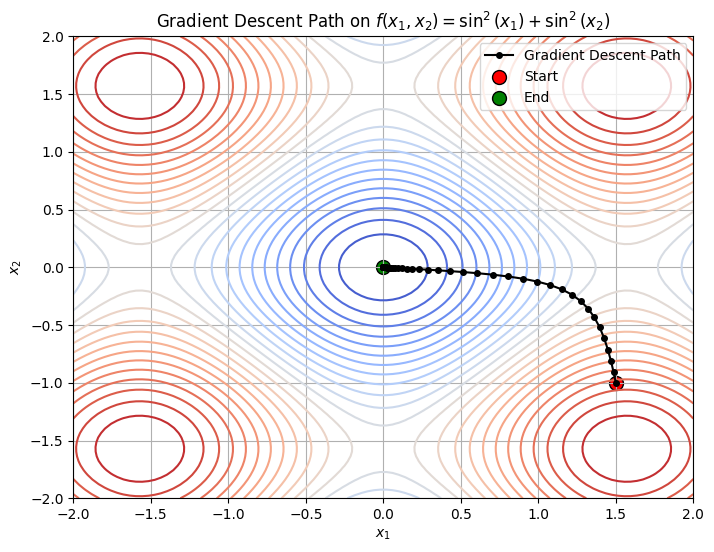

In [10]:
# Create meshgrid for contour plot
x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

# Plot contour and gradient descent path
plt.figure(figsize=(8, 6))
plt.contour(X1, X2, Z, levels=30, cmap="coolwarm")

# Plot gradient descent steps
plt.plot(steps[:, 0], steps[:, 1], marker="o", color="black", markersize=4, label="Gradient Descent Path")

# Mark the starting and ending points
plt.scatter(steps[0, 0], steps[0, 1], color="red", s=100, label="Start", edgecolors="black")
plt.scatter(steps[-1, 0], steps[-1, 1], color="green", s=100, label="End", edgecolors="black")

# Labels and Title
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Gradient Descent Path on $f(x_1, x_2) = \sin^2(x_1) + \sin^2(x_2)$")
plt.legend()
plt.grid()
plt.show()

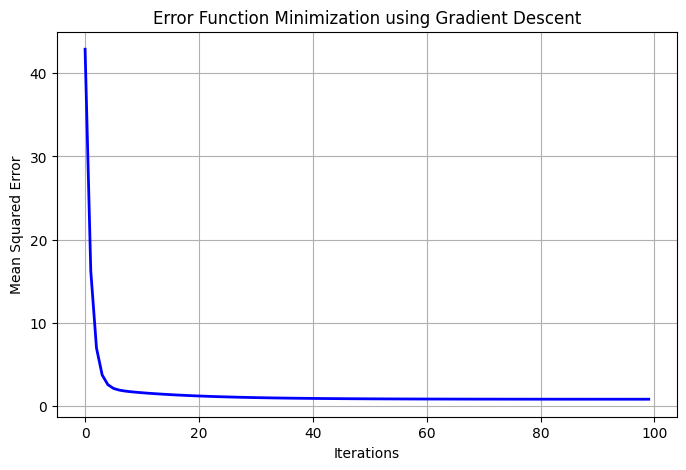

Optimized Parameters: theta_0 = 5.1433, theta_1 = 2.8335


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (simulating y = 3x + 5 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random x values
y = 3 * X + 5 + np.random.randn(100, 1)  # Linear relationship with noise

# Mean Squared Error Function
def mse(theta_0, theta_1, X, y):
    y_pred = theta_0 + theta_1 * X
    return np.mean((y - y_pred) ** 2)

# Compute Gradients
def compute_gradients(theta_0, theta_1, X, y):
    N = len(y)
    y_pred = theta_0 + theta_1 * X
    grad_theta_0 = -2 * np.sum(y - y_pred) / N  # Gradient w.r.t theta_0
    grad_theta_1 = -2 * np.sum((y - y_pred) * X) / N  # Gradient w.r.t theta_1
    return grad_theta_0, grad_theta_1

# Gradient Descent Function
def gradient_descent(lr=0.1, num_iter=100):
    theta_0, theta_1 = np.random.randn(), np.random.randn()  # Initialize parameters randomly
    history = []  # Store (theta_0, theta_1, error)

    for _ in range(num_iter):
        error = mse(theta_0, theta_1, X, y)
        history.append([theta_0, theta_1, error])

        # Compute gradients
        grad_theta_0, grad_theta_1 = compute_gradients(theta_0, theta_1, X, y)

        # Update parameters using gradient descent
        theta_0 -= lr * grad_theta_0
        theta_1 -= lr * grad_theta_1

    return np.array(history), theta_0, theta_1

# Run gradient descent
history, final_theta_0, final_theta_1 = gradient_descent(lr=0.1, num_iter=100)

# Plot Error Function Convergence
plt.figure(figsize=(8, 5))
plt.plot(history[:, 2], color="blue", linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Error Function Minimization using Gradient Descent")
plt.grid()
plt.show()

# Print final optimized parameters
print(f"Optimized Parameters: theta_0 = {final_theta_0:.4f}, theta_1 = {final_theta_1:.4f}")


In [1]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Model
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
    
    def forward(self, X):
        """ Forward Propagation """
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)  # Activation function
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)  # Output activation
        return self.A2
    
    def backward(self, X, y):
        """ Backpropagation Algorithm """
        m = X.shape[0]
        
        # Compute gradients
        dZ2 = self.A2 - y  # Error in output layer
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.A1)  # Backprop to hidden layer
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases using gradient descent
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    
    def train(self, X, y, epochs=1000):
        """ Train the network """
        for epoch in range(epochs):
            self.forward(X)  # Compute predictions
            self.backward(X, y)  # Compute gradients & update parameters
            if epoch % 100 == 0:
                loss = np.mean((y - self.A2) ** 2)  # Compute loss
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        """ Predict Output """
        return (self.forward(X) > 0.5).astype(int)

# Generate sample dataset (XOR problem)
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Input
y = np.array([[0], [1], [1], [0]])  # XOR labels

# Create and train the Neural Network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, lr=0.1)
nn.train(X, y, epochs=1000)

# Predictions
predictions = nn.predict(X)
print("Predictions:")
print(predictions)


Epoch 0: Loss = 0.2529
Epoch 100: Loss = 0.2504
Epoch 200: Loss = 0.2503
Epoch 300: Loss = 0.2501
Epoch 400: Loss = 0.2500
Epoch 500: Loss = 0.2498
Epoch 600: Loss = 0.2497
Epoch 700: Loss = 0.2495
Epoch 800: Loss = 0.2493
Epoch 900: Loss = 0.2491
Predictions:
[[0]
 [1]
 [0]
 [1]]
